## Tesseract command-line

1. Current version [here pre-installed via Ubuntu PPA](https://github.com/rue-a/ocrd_python_codespace/blob/master/.devcontainer/setup.sh) according to [installation instructions for ocrd_tesserocr](https://github.com/OCR-D/ocrd_tesserocr#from-pypi-and-ppa).

In [1]:
!tesseract --version
!ocrd-tesserocr-recognize --version

tesseract 4.1.1
 leptonica-1.79.0
  libgif 5.1.9 : libjpeg 6b (libjpeg-turbo 2.0.6) : libpng 1.6.37 : libtiff 4.2.0 : zlib 1.2.11 : libwebp 0.6.1 : libopenjp2 2.4.0
 Found AVX512BW
 Found AVX512F
 Found AVX2
 Found AVX
 Found FMA
 Found SSE
 Found libarchive 3.4.3 zlib/1.2.11 liblzma/5.2.5 bz2lib/1.0.8 liblz4/1.9.3 libzstd/1.4.8
Version 0.17.0 (tesseract 4.1.1), ocrd/core 2.52.0


2. Get our [previous image example](https://upload.wikimedia.org/wikipedia/commons/0/0e/Weisse_Scherzhafte_Lieder_003.jpg)

In [12]:
!wget -O input.jpg https://upload.wikimedia.org/wikipedia/commons/0/0e/Weisse_Scherzhafte_Lieder_003.jpg

--2023-06-29 16:19:40--  https://upload.wikimedia.org/wikipedia/commons/0/0e/Weisse_Scherzhafte_Lieder_003.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 91.198.174.208, 2620:0:862:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 620995 (606K) [image/jpeg]
Saving to: ‘input.jpg’

input.jpg           100%[===================>] 606.44K  --.-KB/s    in 0.02s   

2023-06-29 16:19:40 (30.3 MB/s) - ‘input.jpg’ saved [620995/620995]



![](input.jpg)

3. Run Tesseract with default model (for English, synthetically trained):

In [13]:
!tesseract input.jpg output_eng -l eng
!cat output_eng.txt

Tesseract Open Source OCR Engine v4.1.1 with Leptonica
Estimating resolution as 809
Detected 40 diacritics
 

Gy tweis in Der That nicht, twas

id) Der Welt, indem ich ihr die.

Lieder iibergebe, fur ein Compli-
ment maden foll, Gie wird unju-
frieden fey, Daf man fie mit folchert
Tandeleyen tberhauft, und ich werde
nichtd daranf zu antworten twiffen,
und 8 Beit genug Bbereuen. Aber
wads ift der Autorftols nicht fir eine
wunderfiche Sache? Man glanbe att:
fangs Klos zu feinem Zeitvcrtreibe gu
foielen, man gefallt fi d, und wie bald
bildet man fich nid)t ein, man milffe
auch der swigigen Welt gefallen?
Man lake drucken, man swird geta-
delt: man nimme ¢8 iibel, (chrent tiber
den Verfall des Gefchmacés, und 8
felt nicht viel, daB man feine Lefer nicht
fieber gar fir THhoren Halt. Und wer
thar dev groste Thor id) will die

MY 2 Frage


4. Try another, more fitting pretrained model:

In [14]:
!tesseract input.jpg output_Fraktur -l Fraktur
!cat output_Fraktur.txt

Tesseract Open Source OCR Engine v4.1.1 with Leptonica
Estimating resolution as 809
Detected 40 diacritics
 

GW weis in der That ñicht, was

ih der Welt, indem ich ihr die.

Lieder übergebe, für ein Compli-
ment machen ſoll, Sie wird unzu-
frieden ſeyn, daß man ſie mit ſolchen
Tändeleyen überhäuft, und ich werde
nichts darauf zu antworten wiſſen,
und es Zeit genug bereuen. Aber
was iſ der Autorſtolz nicht für eine
wunderliche Sache? Man glaubt an-
fangs blos zu ſeinem Zeitvertreibe zu
ſpielen, man gefällt <, und wie bald
bildet man ſich nicht ein, man müſſe
auch der wißigen Welt gefallen?
Man läßt drucken, man wird geta-
delt: man nimmt es übel, ſchreyt über
den Verfall des Geſchmacks, und es
fehlt nicht viel, daß man ſeine Lefer nicht
lieber gar für Thoren hält. Und wer
war der größte Thor? ich will die

A 2 Frage


5. download model [trained by OCR community](https://github.com/tesseract-ocr/tesstrain/wiki) on [GT from scanned Fraktur prints](http://doi.org/10.5281/zenodo.1344132):

In [1]:
!sudo wget -O /usr/share/tesseract-ocr/4.00/tessdata/frak2021.traineddata https://ub-backup.bib.uni-mannheim.de/~stweil/tesstrain/frak2021/tessdata_best/frak2021-0.905.traineddata

--2023-06-29 19:52:58--  https://ub-backup.bib.uni-mannheim.de/~stweil/tesstrain/frak2021/tessdata_best/frak2021-0.905.traineddata
Resolving ub-backup.bib.uni-mannheim.de (ub-backup.bib.uni-mannheim.de)... 134.155.36.11, 2001:7c0:2900:24::869b:240b
Connecting to ub-backup.bib.uni-mannheim.de (ub-backup.bib.uni-mannheim.de)|134.155.36.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421140 (3.3M)
Saving to: ‘/usr/share/tesseract-ocr/4.00/tessdata/frak2021.traineddata’

/usr/share/tesserac 100%[===================>]   3.26M  --.-KB/s    in 0.1s    

2023-06-29 19:52:59 (24.0 MB/s) - ‘/usr/share/tesseract-ocr/4.00/tessdata/frak2021.traineddata’ saved [3421140/3421140]



6. Try `frak2021` model, combined with other models (as fallback):

In [3]:
!tesseract input.jpg output_frak2021 -l frak2021+Fraktur+deu
!cat output_frak2021.txt

Failed to load any lstm-specific dictionaries for lang frak2021!!
Error opening data file /usr/share/tesseract-ocr/4.00/tessdata/deu.traineddata
Please make sure the TESSDATA_PREFIX environment variable is set to your "tessdata" directory.
Failed loading language 'deu'
Tesseract Open Source OCR Engine v4.1.1 with Leptonica
Estimating resolution as 809
Detected 40 diacritics
 

GW weis in der That ñicht, was

ih der Welt, indem ich ihr dieſe

Lieder übergebe, für ein Compli⸗
ment machen ſoll, Sie wird unzu-
frieden ſeyn, daß man ſie mit ſolchen
Taͤndeleyen überhäuft, und ich werde
nichts darauf zu antworten wiſſen,
und es Zeit genug bereuen. Aber
was iſt der Autorſtolz nicht für eine
wunderliche Sache? Man glaubt an⸗
fangs blos zu ſeinem Zeitvertreibe zu
ſpielen, man gefaͤllt ſi <, und wie bald
bildet man ſich nicht ein, man müſſe
auch der wißigen Welt gefallen?
Man läßt drucken, man wird geta-
delt: man nimmt es übel, ſchreyt uͤber
den Verfall des Geſchmacks, und es
fehlt nicht viel, d

## Tesseract Python API (tesserocr)

1. [Documentation](https://tesseract-ocr.github.io/) covers many aspects, including [C/C++ API](https://tesseract-ocr.github.io/tessapi/5.x/), 
which heavily builds upon [Leptonica](http://www.leptonica.org/) data structures.

More high-level API is available in **Python bindings**, which use [PIL for image processing](https://pillow.readthedocs.io/):
- [pytesseract](https://github.com/madmaze/pytesseract)
- [**tesserocr**](https://github.com/sirfz/tesserocr/)

mode: RGB
info: {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
size: (2339, 3308)


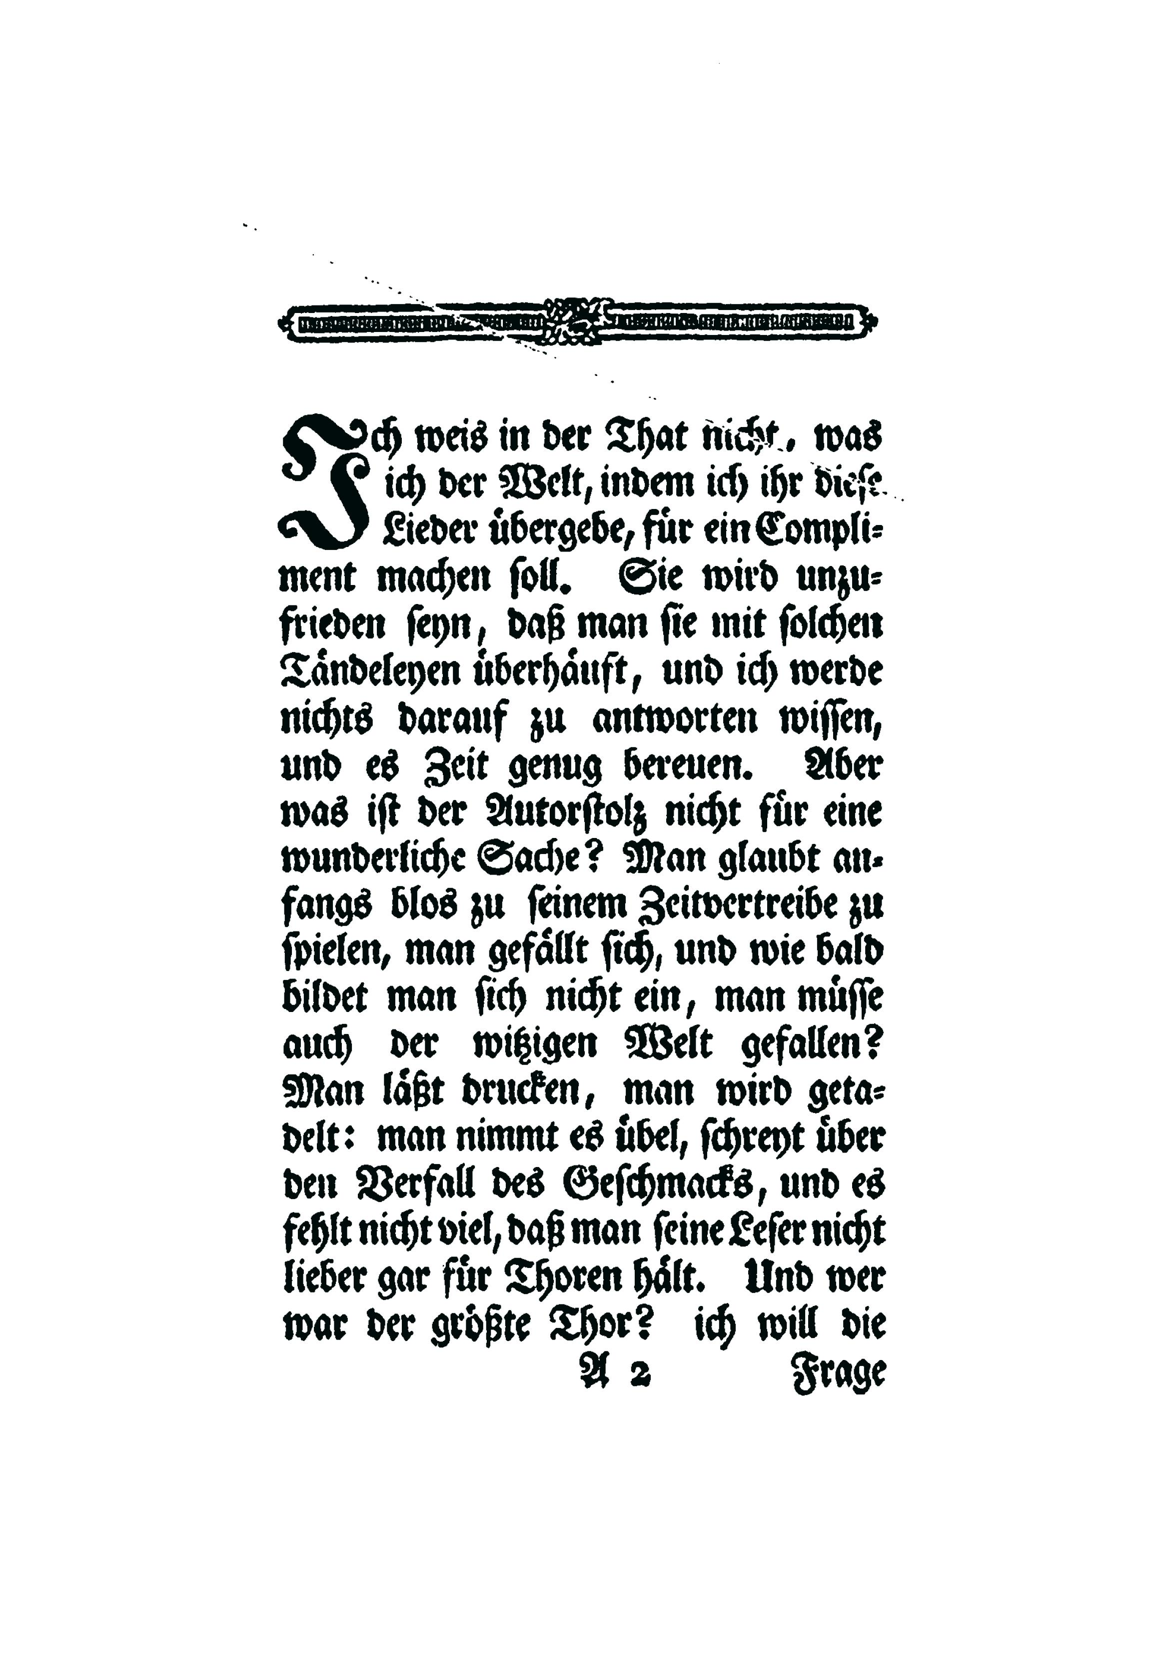

In [2]:
from PIL import Image
img = Image.open('input.jpg')
print(f"mode: {img.mode}")
print(f"info: {img.info}")
print(f"size: {img.size}")
img.resize([dim//2 for dim in img.size]).show()

In [3]:
import tesserocr
help(tesserocr)

Help on module tesserocr:

NAME
    tesserocr - Python wrapper around the Tesseract-OCR C++ API

DESCRIPTION
    This module provides a wrapper class :class:`PyTessBaseAPI` to call
    Tesseract API methods. See :class:`PyTessBaseAPI` for details.
    
    In addition, helper functions are provided for ocr operations:
    
    >>> text = image_to_text(Image.open('./image.jpg').convert('L'), lang='eng')
    >>> text = file_to_text('./image.jpg', psm=PSM.AUTO)
    >>> print tesseract_version()
    tesseract 3.04.00
        leptonica-1.72
        libjpeg 8d (libjpeg-turbo 1.3.0) : libpng 1.2.51 : libtiff 4.0.3 : zlib 1.2.8
    >>> get_languages()
    ('/usr/share/tesseract-ocr/tessdata/',
     ['eng', 'osd', 'equ'])

CLASSES
    builtins.object
        PyChoiceIterator
        PyPageIterator
            PyLTRResultIterator
                PyResultIterator
        PyTessBaseAPI
    _Enum(builtins.object)
        DIR
        Justification
        OEM
        Orientation
        PSM
        

2. Using tesserocr (simplest case):

In [4]:
print(tesserocr.file_to_text('input.jpg', lang='frak2021+Fraktur+deu'))

 

GW weis in der That nicht, mag

ih der Welt, indem ich ihr dieſe

Lieder übergebe, für ein Compli⸗
ment machen ſoll, Sie wird unzu-
frieden ſeyn, daß man fie mit folchen
Taͤndeleyen uͤberhaͤuft, und ich werde
nichts darauf zu antworten wiſſen,
und es Zeit genug bereuen. Aber
was iſt der Autorſtolz nicht für eine
wunderliche Sache? Man glaubt an⸗
fangs blos zu ſeinem Zeitvertreibe zu
ſpielen, man gefaͤllt fi <, und wie bald
bildet man ſich nicht ein, man müſſe
auch der wißigen Welt gefallen?
Man laßt drucken, man wird geta-
delt: man nimmt es übel, fchrent über
den Verfall des Geſchmacks, und es
fehlt nicht viel, daß man ſeine Lefer nicht
lieber gar für Thoren hält. Und wer
war der größte Thor? ich will die

A 2 Frage



(or equivalently:)

In [5]:
print(tesserocr.image_to_text(img, lang='frak2021+Fraktur+deu'))

 

GW weis in der That nicht, was

ih der Welt, indem ich ihr dieſe

Lieder übergebe, für ein Compli-
ment machen ſoll, Sie wird unzu-
frieden ſeyn, daß man ſie mit ſolchen
Taͤndeleyen überhäuft, und ich werde
nichts darauf zu antworten wiſſen,
und es Zeit genug bereuen. Aber
was iſt der Autorſtolz nicht für eine
wunderliche Sache? Man glaubt an⸗
fangs blos zu ſeinem Zeitvertreibe zu
ſpielen, man gefaͤllt fi <, und wie bald
bildet man ſich nicht ein, man müſſe
auch der wißigen Welt gefallen?
Man laßt drucken, man wird geta-
delt: man nimmt es übel, fchrent über
den Verfall des Geſchmacks, und es
fehlt nicht viel, daß man ſeine Lefer nicht
lieber gar für Thoren hält. Und wer
war der größte Thor? ich will die

A 2 Frage



See currently installed models:

In [6]:
tesserocr.get_languages()

('/usr/share/tesseract-ocr/4.00/tessdata/',
 ['Fraktur', 'Latin', 'deu', 'eng', 'frak2021', 'osd'])

3. Using tesserocr (stateful API):

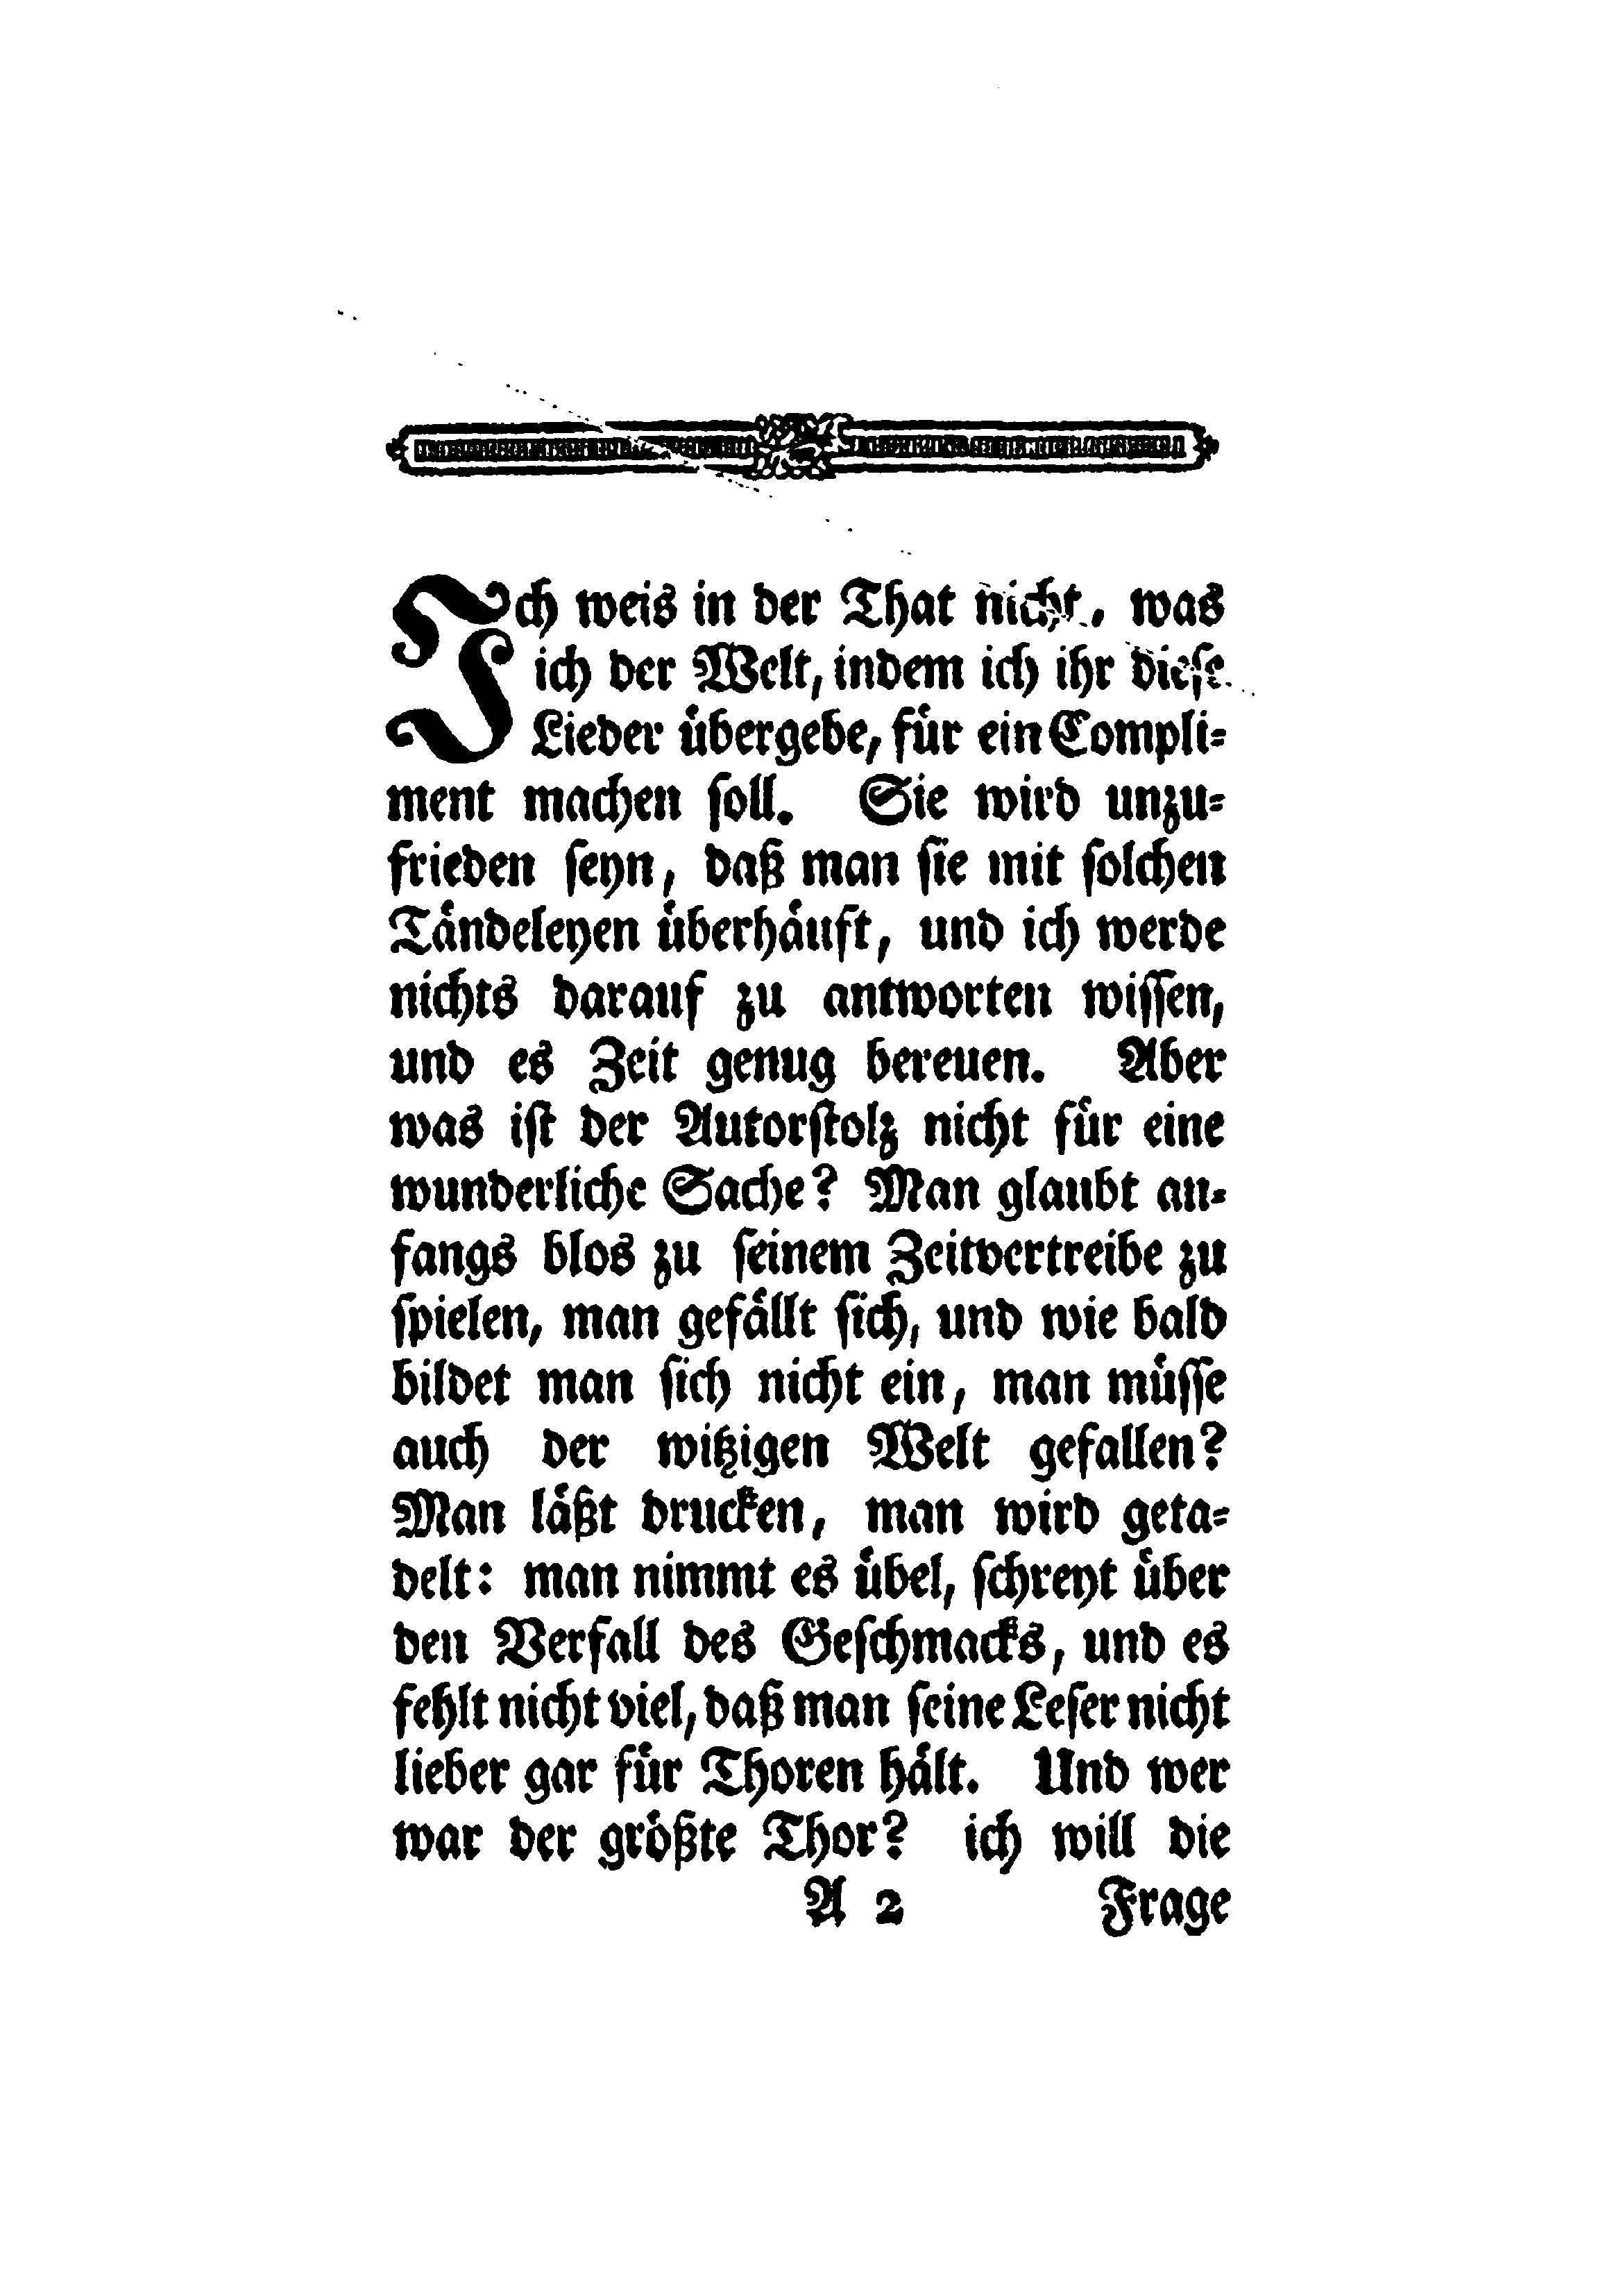

 

GW weis in der That nicht, was

ih der Welt, indem ich ihr dieſe

Lieder übergebe, für ein Compli-
ment machen ſoll, Sie wird unzu-
frieden ſeyn, daß man ſie mit ſolchen
Taͤndeleyen überhäuft, und ich werde
nichts darauf zu antworten wiſſen,
und es Zeit genug bereuen. Aber
was iſt der Autorſtolz nicht für eine
wunderliche Sache? Man glaubt an⸗
fangs blos zu ſeinem Zeitvertreibe zu
ſpielen, man gefaͤllt fi <, und wie bald
bildet man ſich nicht ein, man müſſe
auch der wißigen Welt gefallen?
Man laßt drucken, man wird geta-
delt: man nimmt es übel, fchrent über
den Verfall des Geſchmacks, und es
fehlt nicht viel, daß man ſeine Lefer nicht
lieber gar für Thoren hält. Und wer
war der größte Thor? ich will die

A 2 Frage



In [9]:
with tesserocr.PyTessBaseAPI(lang='frak2021+Fraktur+deu') as tess:
    tess.SetImage(img)
    tess.SetPageSegMode(tesserocr.PSM.AUTO)
    tess.Recognize()
    # show result from internal binarization
    tess.GetThresholdedImage().show()
    # show overall text result
    print(tess.GetUTF8Text())

4. Using tesserocr (result tree structure):

In [ ]:
with tesserocr.PyTessBaseAPI(lang='frak2021+Fraktur+deu') as tess:
    tess.SetImage(img)
    tess.SetPageSegMode(tesserocr.PSM.AUTO)
    tess.Recognize()
    rit = tess.GetIterator()
    ril = tesserocr.RIL.BLOCK
    for block in tesserocr.iterate_level(rit, ril):
        bbox = block.BoundingBox(ril)
        imgblock = img.crop(bbox)
        imgblock.show()
        type_ = block.BlockType()
        print(dict(map(reversed,tesserocr.PT._dict__.items()))[type_])

In [2]:
import ocrd
import ocrd_tesserocr